# CHEMICALS SEGREGATION

In [1]:
# importing files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
#loading data
dfx=pd.read_csv('DATASET/Logistic_X_Train.csv')
X_train=dfx.values
dfy=pd.read_csv('DATASET/Logistic_Y_Train.csv')
Y_train=dfy.values


ones=np.ones((X_train.shape[0],1))
X_train=np.hstack((ones,X_train))
print(X_train.shape,Y_train.shape)



(3000, 4) (3000, 1)


In [63]:
# logistic regression
def hypothesis(X,theta):
    hx=np.dot(theta,X.T)
    return sigmoid(hx.T)
def sigmoid(X):
    return 1.0/(1.0+np.exp(-1.0*X))

def error(X,Y,theta):
    m=X.shape[0]
    hx=hypothesis(X,theta)
    loss=np.sum(Y*np.log2(hx)+(1-Y)*np.log2(1-hx))
    return -loss/m
def grad(X,Y,theta):
    hx=hypothesis(X,theta)
    diff=hx-Y
    grad=np.sum(diff*X,axis=0)
    grad.reshape((1,-1))
    return grad
def gradient_descent(X,Y,theta,learning_rate=0.05,max_iterations=5000):
    err=[]
    acc=[]
    for i in range(max_iterations):
        e=error(X,Y,theta)
        acc.append(accuracy(X,Y,theta))
        err.append(e)
        gra=grad(X,Y,theta)
        theta=theta-learning_rate*gra
    return err,acc,theta
def accuracy(X,Y,theta):
    hx=hypothesis(X,theta)
    hx=(hx>=0.5)
    m=X.shape[0]
    return (Y==hx).sum()/m*100


In [64]:
# initialising data
theta=np.random.random((1,X_train.shape[1]))
err,ac,theta=gradient_descent(X_train,Y_train,theta)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


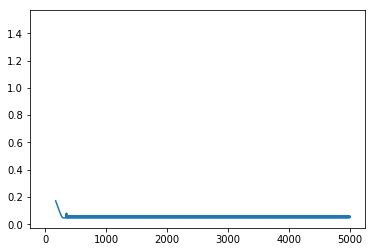

In [65]:
plt.plot(err)

In [55]:
print(theta)

[[-5.00317682 -5.765842    3.73192811 -2.96706775]]


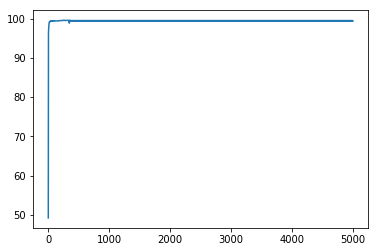

In [67]:
plt.plot(ac)

In [71]:
# loading test file
dfx=pd.read_csv('DATASET/Logistic_X_Test.csv')
X_test=dfx.values
print(X_test.shape)

(1000, 3)


In [72]:
ones=np.ones((X_test.shape[0],1))
X_test=np.hstack((ones,X_test))

In [73]:
Y_test=hypothesis(X_test,theta)
Y_test=(Y_test>=0.5)

In [79]:
print(Y_test.shape)
Y_test=1*Y_test

(1000, 1)


In [80]:
dfy=pd.DataFrame(Y_test)
dfy.to_csv('DATASET/LOGISTIC_Y_Test.csv',header=['label'],index=False)